# REGRESI LINEAR

Regresi Linear: adalah metode yang digunakan untuk memodelkan hubungan antara variabel dependen (y), dan variabel independen (x). Secara matematis, regresi didasarkan pada persamaan dasar garis sebagai berikut:

y = a + bx

Di mana:

y = variabel dependen atau nilai yang akan diprediksi
b = kemiringan garis
x = variabel bebas
a = perpotongan y
tujuan utamanya adalah menemukan garis paling pas yang meminimalkan jumlah kesalahan kuadrat antara nilai sebenarnya dari harga saham (y) dan harga saham yang diprediksi di semua titik dataset.

Ada banyak jenis regresi linier, yang paling sederhana hanya satu variabel bebas (x) dan jika ada lebih dari satu variabel bebas, itu termasuk dalam kategori regresi linier berganda. Dalam latihan ini hanya akan ada satu variabel independen yang merupakan "terbuka" dari harga saham dan kami mencoba untuk memprediksi harga penutupan. Ide utama dari latihan ini adalah menggunakan regresi linier untuk memprediksi harga saham sehingga kita tidak melihat menggunakan semua dataset tetapi hanya informasi dari satu perusahaan.

In [15]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Sebelumnya kita telah memiliki data Revenue bisnis penjualan es krim dan temperatur suhu udara (Celcius)

In [16]:
df = pd.read_csv('IceCreamData.csv') 
df.head() 


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


Rumusan Masalah :
1. Berapa estimasi Revenue yang akan didapat oleh penjual es krim ketika berjualan di suhu 35 C
2. Berapakah Correlation Coefficient, dan Coefficient of Determination (R2)?
3. Hitung Metric Regresi berikut: Mean Absolute Error, Mean Square Error, dan Root Mean Square Error

Untuk menyelesaikan masalah tersebut, langkah pertama kita membutuhkan variabel x dan y untuk mengetahui titik yang diperlukan. Variabel x menandakan temperatur dan variabel y menandakan Revenue

In [17]:
# variable yang digunakan
x = df['Temperature']
y = df['Revenue']


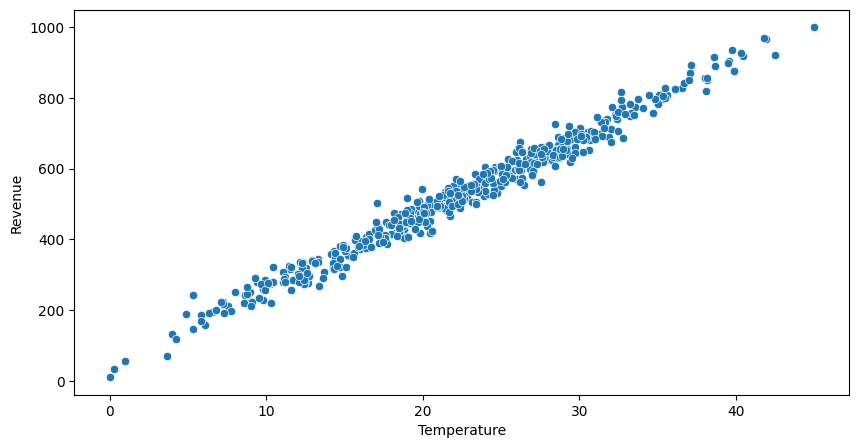

In [18]:
plt.figure(figsize = (10,5)) 
sns.scatterplot( x=x, y=y)
plt.show()

# Regression Line

Regression Line adalah garis trend yang kita gunakan untuk memodelkan trend linier

In [19]:
# 1. Jika kita berjualan ketika suhu udara sebesar 35 C, berapa estimasi revenue yang akan didapatkan? gunakan metode simple linear regression untuk menjawabnya

sum_x = x.sum()
sum_y = y.sum()
sum_xy = (x * y).sum()
sum_x2 = (x**2).sum()
n = df.shape[0]

m = ( (n * sum_xy) - (sum_x * sum_y) ) / ( (n * sum_x2) - (sum_x**2) )
b = ( sum_y - (m * sum_x) ) / n 

# y = mx + b
y_pred = (m*x) + b 

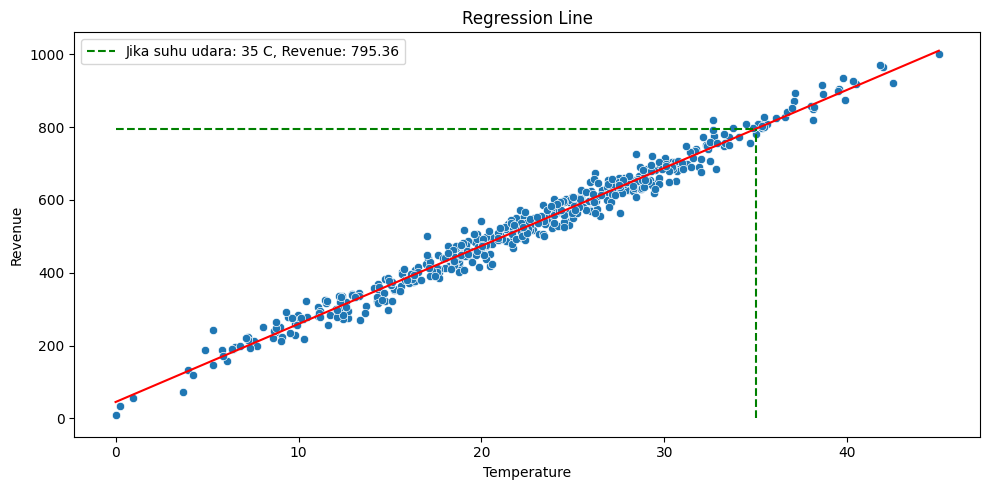

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot( x=x, y=y)
sns.lineplot(x=x,y=y_pred, color='red').set_title('Regression Line')

temp = 35 
rev = ((m*temp) + b)
plt.vlines(x=temp, ymin=0,ymax=rev, color='g', label=f'Jika suhu udara: {temp} C, Revenue: {round(rev,2)}',linestyle='--')
plt.hlines(y=rev, xmin=0,xmax=temp, color='g',linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

Linear Regression Assumptions:
Linearity
No Multicollinearity
Mean of Residuals is Zero
Homoscedasticity
Residuals Normality
The X variables and Residuals are uncorelated
jika asumsi diatas tidak terpenuhi, estimasi yang dilakukan akan menjadi bias


Apa itu Residual? 

Residual adalah selisih antara data observasi dengan prediksi. Residual Analysis adalah teknik yang digunakan untuk menilai validitas model regresi berdasarkan pengamatan pada pola yang terjadi antara data prediksi dengan residual. Untuk memvisualisasikannya dapat menggunakan scatterplot dimana sumbu x sebagai prediksi, sumbu y sebagai residual. Model dikatakan bagus jika residual terdistribusi simetris, cenderung berkumpul di tengah atau berada pada garis horizontal plot, dan polanya acak. Jika terdapat Pola, artinya model tidak begiru bagus dalam menangkap hubungan antara variable x dan y dengan bagus. berikut adalah link artikel yang dapat digunakan sebagai referensi, di artikel tersebut kita bisa mengenal berbagai macam pola yang dapat terjadi pada saat kita melakukan residual analysis dan bagaimana cara menanggulanginya. 

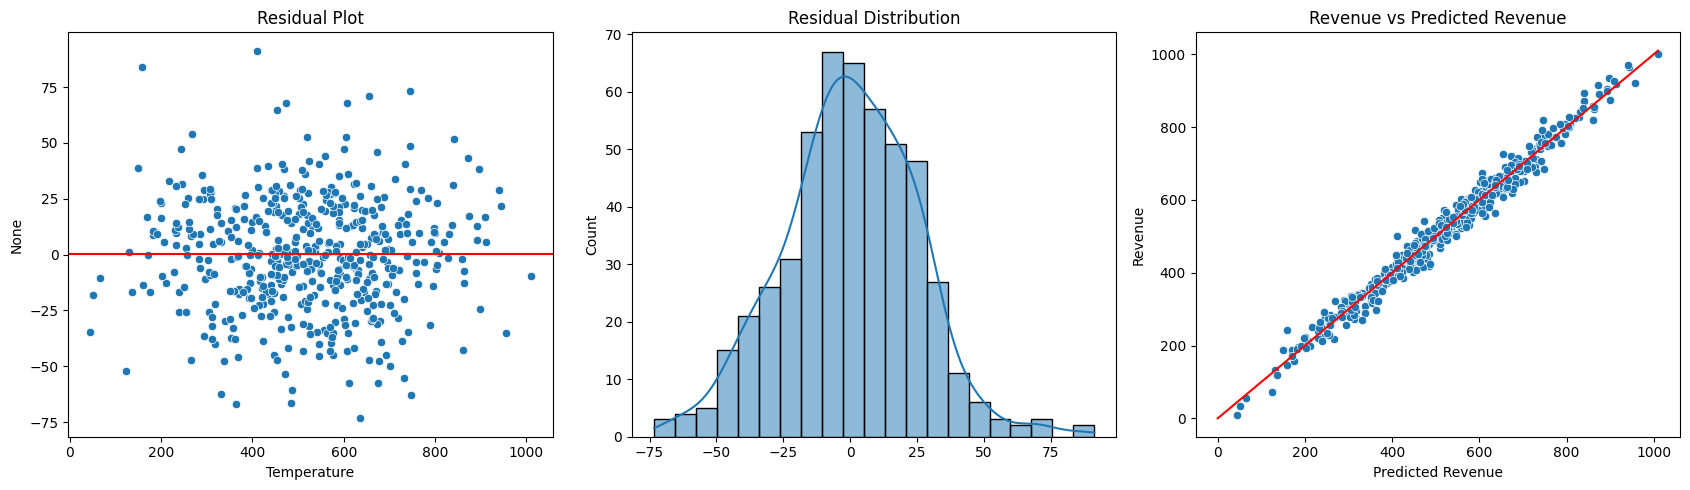

In [21]:
fig, axes = plt.subplots( nrows=1, ncols=3,figsize = (17,5))

# col 1
residual = y - y_pred
sns.scatterplot(x=y_pred, y=residual,ax=axes[0]).axhline(y=0.5, color='red', linestyle='-')
axes[0].set_title('Residual Plot')

# col 2
sns.histplot(residual, kde=True, ax=axes[1]).set_title('Residual Distribution')

# col 3
y_pred.name = 'Predicted Revenue'
sns.scatterplot( x=y_pred, y=y, ax=axes[2]).set_title('Revenue vs Predicted Revenue')
point1 = [0, 0]
point2 = [140000, 140000]
x_plot = [point1[0], point2[0]] 
y_plot = [point1[1], point2[1]]
plt.plot([0,y_pred.max()], [0,y_pred.max()], color='red')

plt.tight_layout()
plt.show()

Correlation Coefficient

Correlation Coefficient (korelasi) digunakan untuk menggambarkan seberapa kuat hubungan antara variable x dan y. korelasi memiliki rentang jarak antara -1 sampai 1. korelasi dikatakan kuat jika nilainya >0.7 atau <-0.7 , moderat jika diantara 0.3 0.7 atau -0.3 -0.7, dan lemah jika berada direntang -0.3 sampai 0.3. berdasarkan arahnya, korelasi dapat dibagi menjadi dua kategori yaitu Positive dan Negative, jika Positive maka ketika X meningkat y ikut meningkat, jika Negative ketika X meningkat y menurun.

In [22]:
# mean 
x_mean = x.mean()
y_mean = y.mean()
# std deviation 
x_std = math.sqrt( ((x - x_mean)**2).sum()/(n-1) )
y_std = math.sqrt( ((y - y_mean)**2).sum()/(n-1) )
# corr 
corr = (1/(n-1))* (((x - x_mean)/ x_std) * ((y - y_mean)/ y_std)).sum() 
print(f'Correlation Coefficient (Manual) : {corr}' ) 
print(f'Correlation Coefficient (Pandas) : {df.corr()["Revenue"][0]}' ) 

Correlation Coefficient (Manual) : 0.9898015963401863
Correlation Coefficient (Pandas) : 0.9898015963401853


C:\Users\Nila Farihah\AppData\Local\Temp\ipykernel_11928\2401700744.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Correlation Coefficient (Pandas) : {df.corr()["Revenue"][0]}' )


korelasinya 0.98 . Hal ini menunjukkan adanya hubungan positive yang kuat antara variable Temperature dengan Revenue

# Coefficient of Determination (R2)

In [24]:
# terdapat dua cara untuk menghitung r2

# cara 1:  kita hanya perlu mengkuadratkan korelasi koefisien yang sudah dihitung sebelumnya 
r2 = corr**2

# cara 2: kita bisa memanfaatkan hasil prediksi. 
ss_res = ((y - y_pred)**2).sum()
ss_tot = ((y - y_mean)**2).sum()
r2_v2 = 1 - (ss_res/ss_tot)

print(f'R2 (Manual_v1) : {r2}')
print(f'R2 (Manual_v2) : {r2_v2}')
print(f'R2 (Scikit Learn) : {r2_score(y, y_pred)}')

R2 (Manual_v1) : 0.9797072001175811
R2 (Manual_v2) : 0.979707200117581
R2 (Scikit Learn) : 0.979707200117581


r2 memiliki rentang antara 0 sampai 1, semakin mendekati 1 semakin bagus. 
r2 yang dihasilkan model regresi kita sebesar 0.97, jika nilai mendekati 1, artinya variabel independen memberikan hampir semua informasi yang dibutuhkan untuk memprediksi variabel dependen. 
Namun, jika nilai r2 kecil, artinya kemampuan variabel independen dalam menjelaskan variabel dependen tidak terlalu baik. r2 memiliki kekurangan yaitu tidak bisa memberikan gambaran besaran error, untuk melengkapi kekurangan tersebut, kita akan hitung juga metric regresi yang lain.

# Error Metrics

# Mean Absolute Error (MAE)

Mean Absolute Error adalah rata-rata residual yang diabsolutkan

In [25]:
# y = data aktual
# y-hat = prediksi
# error = selisih y dan y-hat
# error abs = error yang diabsolutekan agar tidak ada data negatif

pd.DataFrame({
    'y':y,
    'y-hat':y_pred,
    'error':y-y_pred,
    'error abs':(y - y_pred).abs()
    }).head()

,y,y-hat,error,error abs
0,534.799028,571.634337,-36.835308,36.835308
1,625.190122,602.476847,22.713274,22.713274
2,660.632289,640.761497,19.870792,19.870792
3,487.706960,486.469919,1.237041,1.237041
4,316.240194,291.507963,24.732232,24.732232


In [26]:
# setelah berhasil menghitung error absolute, langkah selanjutnya adalah mencari rata-ratanya, bisa dengan dibagi n 
print(f'MAE (Manual) : {(y - y_pred).abs().sum()/n}')
print(f'MAE (Scikit Learn) : {mean_absolute_error(y,y_pred)}') 

MAE (Manual) : 19.585861206200104
MAE (Scikit Learn) : 19.585861206200104


MAE sebesar 19.58, artinya setiap kali kita melakukan prediksi, kita bisa expect akan ada error sebesar 19.58. MAE sangat interpretable karena skala unitnya sama dengan target. semakin kecil score MAE semakin bagus.

# Mean Square Error (MSE)
Mean Square Error adalah rata-rata residual yang dikuadratkan

In [27]:
pd.DataFrame({
    'y':y,
    'y-hat':y_pred,
    'error':y-y_pred,
    'error2':(y - y_pred)**2
    }).head()

,y,y-hat,error,error2
0,534.799028,571.634337,-36.835308,1356.839927
1,625.190122,602.476847,22.713274,515.892818
2,660.632289,640.761497,19.870792,394.848358
3,487.706960,486.469919,1.237041,1.530271
4,316.240194,291.507963,24.732232,611.683292


In [28]:
# setelah berhasil menghitung error kuadrat, langkah selanjutnya sebagai berikut:
# jumlahkan error kuadrat => bagi dengan n (banyaknya data point)
mse = ((y-y_pred)**2).sum()/n
print(f'MSE (Manual): {mse}')
# mse dengan Scikit Learn
print(f'MSE (Scikit Learn): {mean_squared_error(y,y_pred)}')

MSE (Manual): 623.0963653020005
MSE (Scikit Learn): 623.0963653020005


Didapati score MSE nya sebesar 623, semakin kecil semakin bagus. Kekurangan MSE adalah sulitnya menginterpretasikan hasilnya, apakah 623 adalah hasil yang bagus? kita hanya tahu bahwa semakin kecil score MSE semakin bagus, tapi kita tidak tahu seberapa kecil score MSE agar dapat dikatakan bagus. Karena hal ini banyak orang lebih memilih menggunakan pengembangan metric MSE, seperti RMSE.

# Root Mean Square Error (RMSE)
Root Mean Square Error adalah akar pangkat dari MSE. biasanya metric ini lebih sering digunakan daripada MSE karena RMSE memiliki skala unit yang sama dengan target variable sehingga interpretasinya lebih mudah. nama lain dari RMSE adalah Root Mean Square Deviation RMSD, kenapa dinamakan deviation? karena RMSE merupakan standard deviasi dari best fit line. agar lebih jelas, perhatikan visualisasi dibawah.

In [29]:
# y = data aktual
# y-hat = prediksi
# error = selisih y dan y-hat
# error2 = error yang dikuadratkan

rmse_df = pd.DataFrame({
    'y':y,
    'y-hat':y_pred,
    'error':y-y_pred,
    'error2':(y-y_pred)**2})
rmse_df

,y,y-hat,error,error2
0,534.799028,571.634337,-36.835308,1356.839927
1,625.190122,602.476847,22.713274,515.892818
2,660.632289,640.761497,19.870792,394.848358
3,487.706960,486.469919,1.237041,1.530271
4,316.240194,291.507963,24.732232,611.683292
...,...,...,...,...
495,524.746364,522.485865,2.260499,5.109857
496,755.818399,750.178416,5.639983,31.809403
497,306.090719,314.766991,-8.676272,75.277691
498,566.217304,524.362249,41.855055,1751.845610


In [30]:
# setelah berhasil menghitung error kuadrat, langkah selanjutnya sebagai berikut:
# jumlahkan error kuadrat => bagi dengan n (banyaknya data point) => akar kuadratkan
rmse = math.sqrt(((y-y_pred)**2).sum()/n)
print(f'RMSE (Manual): {rmse}')

# RMSE dengan Scikit Learn 
print(f'RMSE (Scikit Learn): {math.sqrt(mean_squared_error(y,y_pred))}')

RMSE (Manual): 24.961898271205268
RMSE (Scikit Learn): 24.961898271205268


pada normal curve, 68% data point berada direntang +1 dan -1 standard deviasi dari rata-rata.


Hal yang sama juga berlaku pada RMSE. Karena RMSE adalah standard deviasi dari best line fit, kita bisa interpretasikan bahwa sebanyak 68% data point berada pada rentang 1 standard deviasi dari best fit line. Semakin kecil RMSE semakin bagus.

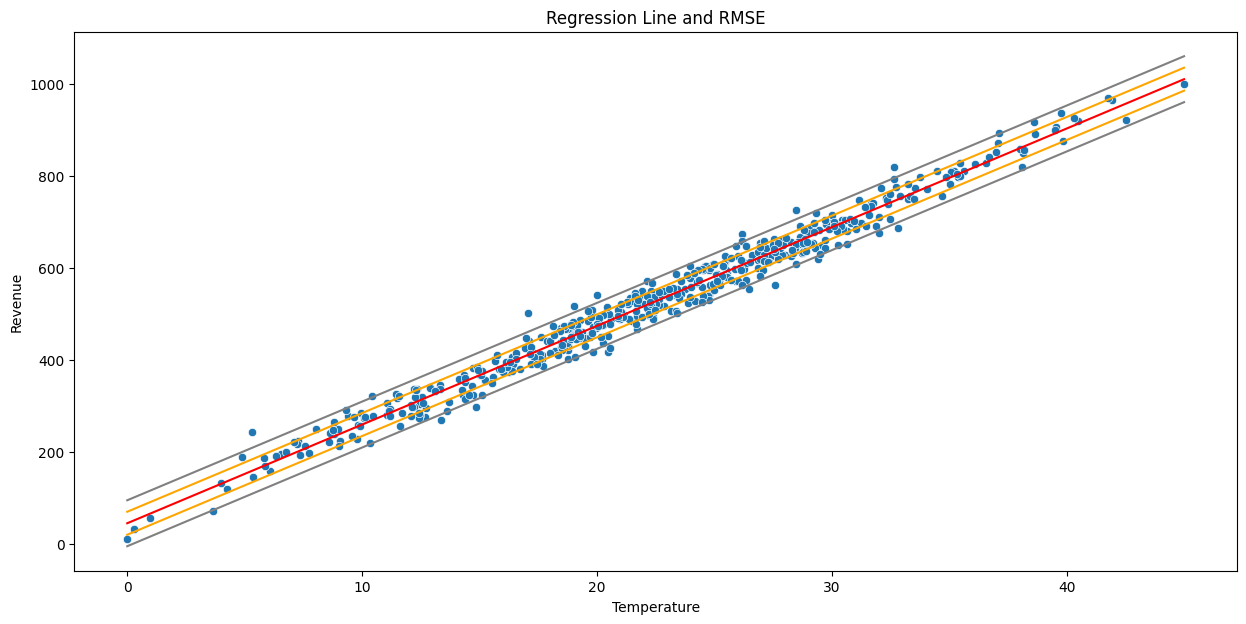

In [31]:
plt.figure(figsize=(15,7))
sns.scatterplot( x=x, y=y)
sns.lineplot(x=x,y=y_pred, color='red').set_title('Regression Line and RMSE')

# 68 % data berada pada batas garis RMSE yang berwarna orange
sns.lineplot(x=x,y=y_pred+rmse, color='orange')
sns.lineplot(x=x,y=y_pred-rmse, color='orange')

# 95 % data berada pada batas garis RMSE yang berwarna abu-abu
sns.lineplot(x=x,y=y_pred+(rmse*2), color='grey')
sns.lineplot(x=x,y=y_pred-(rmse*2), color='grey')

plt.show()